In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D , Flatten ,Dense, Dropout , BatchNormalization
from PIL import Image 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# ONE HOT ENCODING THE TARGET CLASSES


In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

# 0 - Tumor
# 1 - normal

OneHotEncoder()

# Creating 3 Important Lists --
1.data list for storing image data in numpy array form 

2.paths list for storing paths for all images 

3.result list for storing one hot encoded form of target class whether normal or tumor

In [3]:
#This cell updates result list for images with tumor
data = []
paths = []
result = []

for r,d,f in os.walk(r'../input/brain-mri-images-for-brain-tumor-detection/yes'):
     for file in f:
            if '.jpg' in file:
                paths.append(os.path.join(r, file))
                
for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
    

In [4]:
#This cell updates result list for images without tumor
paths = []
for r,d,f in os.walk(r"../input/brain-mri-images-for-brain-tumor-detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
            
    for path in paths:
        img = Image.open(path)
        img = img.resize((128,128))
        img = np.array(img)
        if(img.shape == (128,128,3)):
            data.append(np.array(img))
            result.append(encoder.transform([[1]]).toarray())

In [5]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [6]:
result = np.array(result)
result = result.reshape(139,2)

#  Splitting the data into Training and Testing

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size =0.2, shuffle = True, random_state = 0)

# Model Building 
Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epoches required to train deep networks.

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2,2), input_shape=(128,128,3), padding = 'same'))
model.add(Conv2D(32, kernel_size=(2,2), activation ='relu', padding = 'same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (2,2), activation = 'relu', padding = 'same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())


2022-11-24 09:22:11.953231: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 09:22:12.038470: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 09:22:12.039316: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 09:22:12.041375: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

In [9]:
y_train.shape

(111, 2)

In [10]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1, validation_data = (x_test, y_test))


Epoch 1/30


2022-11-24 09:22:14.574194: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-24 09:22:15.920760: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


3/3 [==============================] - 8s 289ms/step - loss: 19.8218 - val_loss: 213.5079
Epoch 2/30
3/3 [==============================] - 0s 43ms/step - loss: 21.2329 - val_loss: 40.4320
Epoch 3/30
3/3 [==============================] - 0s 43ms/step - loss: 11.4193 - val_loss: 5.0176
Epoch 4/30
3/3 [==============================] - 0s 43ms/step - loss: 2.5031 - val_loss: 27.2233
Epoch 5/30
3/3 [==============================] - 0s 43ms/step - loss: 5.4642 - val_loss: 28.6786
Epoch 6/30
3/3 [==============================] - 0s 49ms/step - loss: 4.0855 - val_loss: 15.4189
Epoch 7/30
3/3 [==============================] - 0s 43ms/step - loss: 0.7822 - val_loss: 6.3519
Epoch 8/30
3/3 [==============================] - 0s 43ms/step - loss: 1.0977 - val_loss: 2.8574
Epoch 9/30
3/3 [==============================] - 0s 42ms/step - loss: 1.8256 - val_loss: 4.1628
Epoch 10/30
3/3 [==============================] - 0s 42ms/step - loss: 1.2098 - val_loss: 9.4412
Epoch 11/30
3/3 [=============

# Plotting Losses

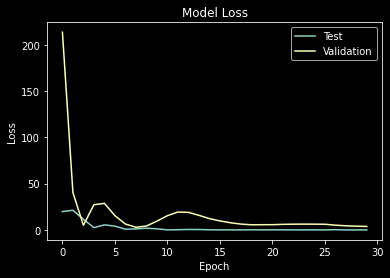

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc ='upper right')
plt.show()

# Just Checking the Model 

In [12]:
def names(number):

    if number==0:
        return 'a Tumor'
    else:
        return 'not a Tumor'

100.0% Confidence This Is a Tumor


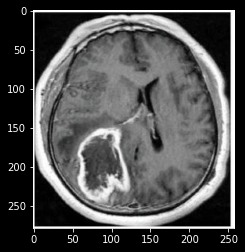

In [13]:
from matplotlib.pyplot import imshow
img = Image.open(r"/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y109.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))